In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.cluster import DBSCAN
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [2]:
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [3]:
data = pd.read_csv("data.csv")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# 初始化LabelEncoder
le = LabelEncoder()

# 遍历DataFrame的每一列
for column in data.columns:
    # 如果列的数据类型是object (通常用于表示字符串)
    if data[column].dtype == 'object':
        # 使用LabelEncoder转换字符串为数字
        data[column] = le.fit_transform(data[column])

In [5]:
# Dropping the id and date columns
data = data.drop(['ID'],axis=1)

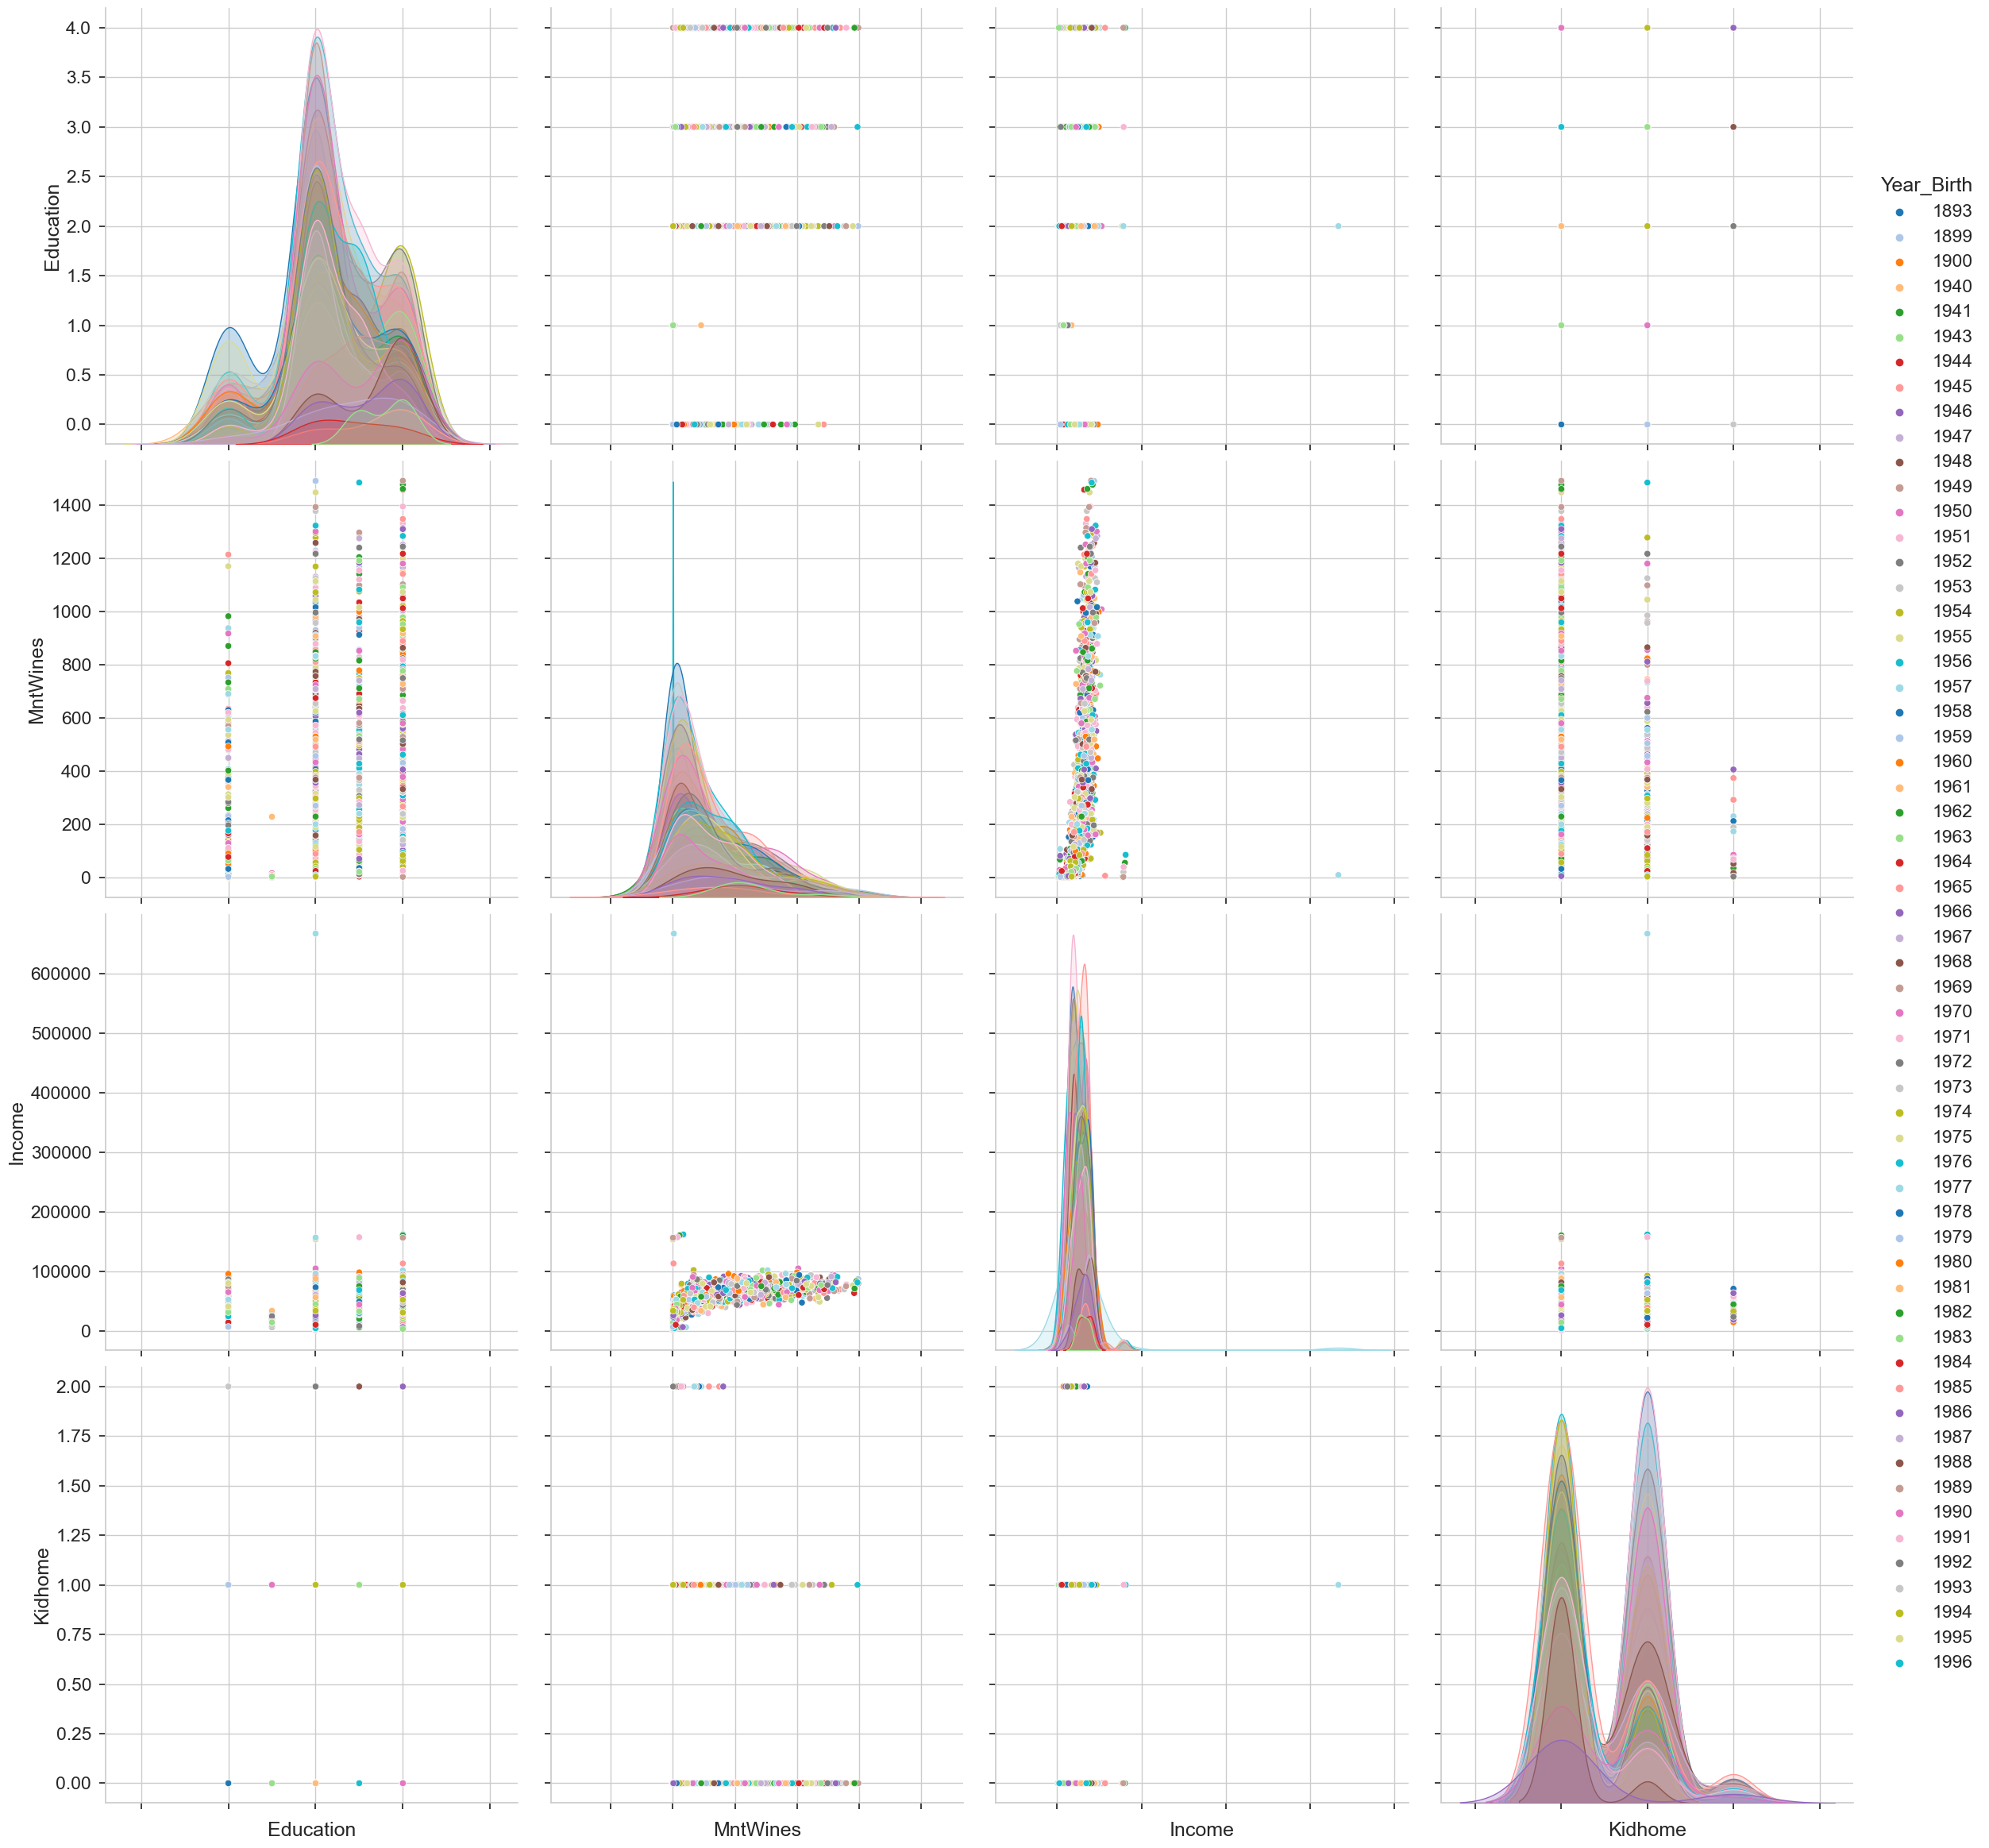

In [6]:
with sns.plotting_context("notebook",font_scale=1.5):
    g = sns.pairplot(data[['Year_Birth','Education','MntWines','Income','Kidhome']], hue='Year_Birth', palette='tab20',size=6)
g.set(xticklabels=[]);

<AxesSubplot: title={'center': 'Pearson Correlation of features'}>

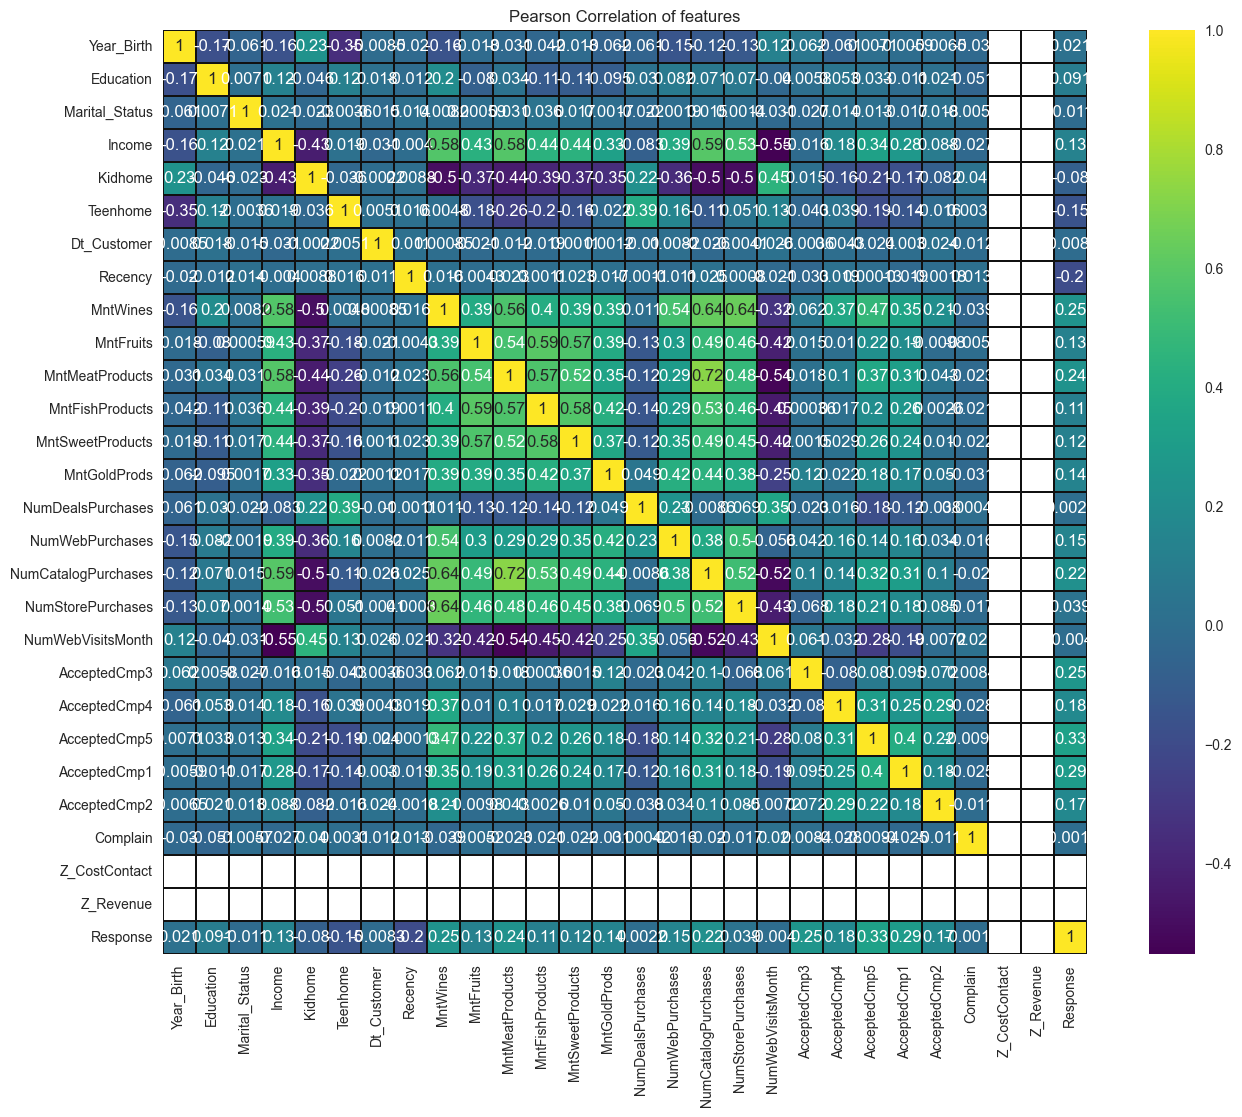

In [7]:
str_list = [] 
for colname, colvalue in data.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)      
num_list = data.columns.difference(str_list) 
data_num = data[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
sns.heatmap(data_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="viridis", linecolor='k', annot=True)

In [8]:
data = data.dropna()
Y = data.Response.values
data = data.drop(['Response'], axis=1)
X = data.values
colnames = data.columns

In [9]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [10]:
# Construct our Linear Regression model
lr = LinearRegression()
lr.fit(X,Y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,Y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


In [12]:
# Using Linear Regression
lr = LinearRegression()
lr.fit(X,Y)
ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)

# Using Ridge 
ridge = Ridge(alpha = 7)
ridge.fit(X,Y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)

# Using Lasso
lasso = Lasso(alpha=.05)
lasso.fit(X, Y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)

In [13]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X,Y)
ranks["RF"] = ranking(rf.feature_importances_, colnames);

building tree 1 of 50building tree 2 of 50

building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


In [14]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

	Lasso	LinReg	RF	RFE	Ridge	Mean
Year_Birth	0.05	0.0	0.4	0.35	0.0	0.16
Education	0.0	0.12	0.13	0.73	0.12	0.22
Marital_Status	0.0	0.01	0.25	0.42	0.01	0.14
Income	0.0	0.0	0.52	0.08	0.0	0.12
Kidhome	0.0	0.01	0.05	0.58	0.01	0.13
Teenhome	0.0	0.26	0.05	0.81	0.27	0.28
Dt_Customer	0.0	0.0	0.45	0.15	0.0	0.12
Recency	0.15	0.01	1.0	0.46	0.01	0.33
MntWines	0.02	0.0	0.47	0.12	0.0	0.12
MntFruits	0.0	0.0	0.28	0.38	0.0	0.13
MntMeatProducts	0.02	0.0	0.59	0.27	0.0	0.18
MntFishProducts	0.01	0.0	0.3	0.23	0.0	0.11
MntSweetProducts	0.01	0.0	0.3	0.19	0.0	0.1
MntGoldProds	0.02	0.0	0.35	0.31	0.0	0.14
NumDealsPurchases	0.0	0.05	0.31	0.62	0.05	0.21
NumWebPurchases	0.0	0.03	0.2	0.5	0.03	0.15
NumCatalogPurchases	0.0	0.02	0.33	0.65	0.02	0.2
NumStorePurchases	1.0	0.06	0.3	0.54	0.07	0.39
NumWebVisitsMonth	0.39	0.07	0.41	0.69	0.07	0.33
AcceptedCmp3	0.0	1.0	0.46	0.96	1.0	0.68
AcceptedCmp4	0.0	0.47	0.04	0.85	0.49	0.37
AcceptedCmp5	0.0	0.92	0.78	1.0	0.92	0.72
AcceptedCmp1	0.0	0.76	0.35	0.92	0.77	0.56
AcceptedCmp2	0.0	0.7

In [15]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

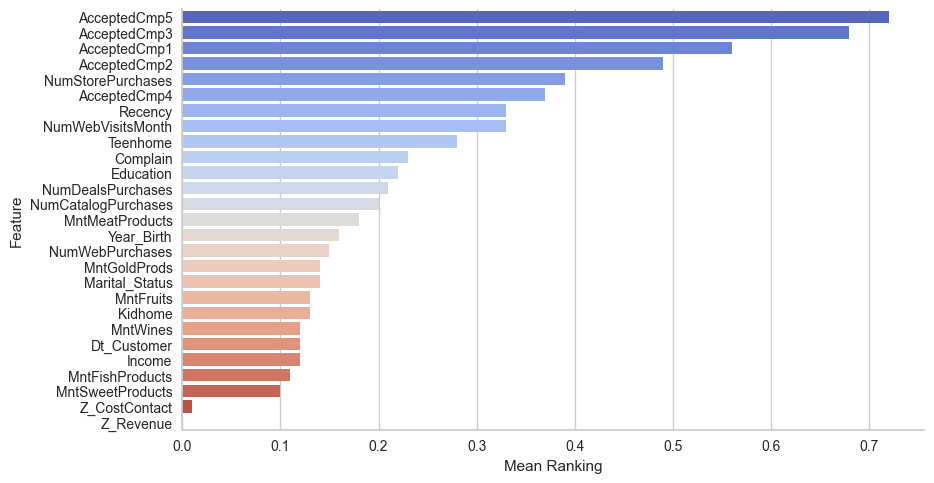

In [26]:
# Let's plot the ranking of the features
sns.catplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", aspect=1.9, palette='coolwarm')